In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
dep = pd.read_csv("~/projectlab/data/18Q1/gene_dependency.csv")

In [18]:
effect = pd.read_csv("~/projectlab/data/18Q1/gene_effect.csv")

#### The final probability of each gene score being generated by the positive (real depletion) distribution is provided to users in the matrix Achilles_gene_dependency.csv.

The relationship between dependency probability and CERES gene effect is monotonic and approximately sigmoidal for all cell lines, but the dependency probability associated with intermediate gene effect scores varies widely between lines (Fig. 11b). This is due to the variance in screen quality between different lines. In a low-quality screen, all dependency probabilities are flattened towards the prior (generally around 0.15), creating a shallower slope. Consequently, a CERES score of −0.5 has very different interpretations in high- and low-quality screens.

In [25]:
dep.columns.values[1:21]

array(['A1BG (1)', 'A1CF (29974)', 'A2M (2)', 'A2ML1 (144568)',
       'A3GALT2 (127550)', 'A4GALT (53947)', 'A4GNT (51146)',
       'AAAS (8086)', 'AACS (65985)', 'AADAC (13)', 'AADACL2 (344752)',
       'AADACL3 (126767)', 'AADACL4 (343066)', 'AADAT (51166)',
       'AAED1 (195827)', 'AAGAB (79719)', 'AAK1 (22848)', 'AAMDC (28971)',
       'AAMP (14)', 'AANAT (15)'], dtype=object)

In [79]:
dep.iloc[0:5]

,line,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZUFSP (221302),ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,143B_BONE,0.009527,0.003395,0.017603,0.014586,0.010632,0.070565,0.003285,0.631898,0.003473,...,0.009366,0.553302,0.093290,0.586516,0.007307,0.030026,0.149373,0.002675,0.045410,0.068436
1,253J_URINARY_TRACT,0.002096,0.001912,0.004284,0.000091,0.009853,0.099446,0.003338,0.292002,0.001276,...,0.001233,0.588125,0.290226,0.420810,0.000046,0.000619,0.043801,0.002375,0.024082,0.105987
2,42MGBA_CENTRAL_NERVOUS_SYSTEM,0.004999,0.010798,0.015825,0.000494,0.054946,0.032881,0.024807,0.292652,0.011763,...,0.024502,0.605398,0.018022,0.785667,0.005370,0.042511,0.392320,0.041063,0.128377,0.224036
3,5637_URINARY_TRACT,0.002268,0.031013,0.007783,0.001403,0.006380,0.000446,0.014294,0.121805,0.000651,...,0.011081,0.399856,0.043166,0.548555,0.011834,0.000192,0.086418,0.000109,0.093442,0.518397
4,59M_OVARY,0.121783,0.004738,0.007759,0.000543,0.017758,0.020626,0.000557,0.528180,0.021075,...,0.007990,0.430732,0.119930,0.724225,0.033821,0.006515,0.280615,0.036790,0.038992,0.145437


In [28]:
dep.loc[0:5]

,line,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZUFSP (221302),ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,143B_BONE,0.009527,0.003395,0.017603,0.014586,0.010632,0.070565,0.003285,0.631898,0.003473,...,0.009366,0.553302,0.093290,0.586516,0.007307,0.030026,0.149373,0.002675,0.045410,0.068436
1,253J_URINARY_TRACT,0.002096,0.001912,0.004284,0.000091,0.009853,0.099446,0.003338,0.292002,0.001276,...,0.001233,0.588125,0.290226,0.420810,0.000046,0.000619,0.043801,0.002375,0.024082,0.105987
2,42MGBA_CENTRAL_NERVOUS_SYSTEM,0.004999,0.010798,0.015825,0.000494,0.054946,0.032881,0.024807,0.292652,0.011763,...,0.024502,0.605398,0.018022,0.785667,0.005370,0.042511,0.392320,0.041063,0.128377,0.224036
3,5637_URINARY_TRACT,0.002268,0.031013,0.007783,0.001403,0.006380,0.000446,0.014294,0.121805,0.000651,...,0.011081,0.399856,0.043166,0.548555,0.011834,0.000192,0.086418,0.000109,0.093442,0.518397
4,59M_OVARY,0.121783,0.004738,0.007759,0.000543,0.017758,0.020626,0.000557,0.528180,0.021075,...,0.007990,0.430732,0.119930,0.724225,0.033821,0.006515,0.280615,0.036790,0.038992,0.145437
5,639V_URINARY_TRACT,0.020968,0.010181,0.030015,0.024156,0.091193,0.024838,0.087947,0.329857,0.018518,...,0.016513,0.375454,0.131257,0.677038,0.010979,0.025317,0.136175,0.031942,0.030318,0.272053


In [77]:
# using BAGEL on the raw readcounts from the Achilles data 
# and comparing the results to the gene dependency output from their pipeline.
# !./Downloads/bagel-master/BAGEL.py

In [34]:
#pip install click
# since we don't have click i will have to run this step at home.

In [ ]:
# !./BAGEL.py fc     

# for accessing the fold count

# !./BAGEL.py fc -i reads_hap1.txt -o hap1-t18 -c 1


In [ ]:
# outputs are hap1-t18.foldchange and hap1-t18.normed_readcount
# !head hap1-t18.foldchange

In [ ]:
# calculate Bayes Factors using BAGEL
#!./BAGEL.py bf
# !./BAGEL.py bf -i hap1-t18.foldchange -o hap1-t18.bf -e CEGv2.txt -n NEGv1.txt -c 1,2,3


In [76]:
# calculate precision-recall plot with BAGEL
#!./BAGEL.py pr
# we will use the same set of reference genes as controls
#!./BAGEL.py pr -i hap1-t18.bf -o hap1-t18.pr -e CEGv2.txt -n NEGv1.txt

#there is a guide for how to visualize this in the bagel guide

In [91]:
effect.columns.values[1:20]

array(['A1BG (1)', 'A1CF (29974)', 'A2M (2)', 'A2ML1 (144568)',
       'A3GALT2 (127550)', 'A4GALT (53947)', 'A4GNT (51146)',
       'AAAS (8086)', 'AACS (65985)', 'AADAC (13)', 'AADACL2 (344752)',
       'AADACL3 (126767)', 'AADACL4 (343066)', 'AADAT (51166)',
       'AAED1 (195827)', 'AAGAB (79719)', 'AAK1 (22848)', 'AAMDC (28971)',
       'AAMP (14)'], dtype=object)

Text(0.5, 1.0, 'cdk4')

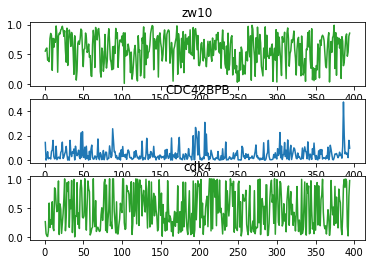

In [55]:
fig, axis = plt.subplots(3)
#fig.subtitle("subplots")
zw10 = dep["ZW10 (9183)"]
cdk4 = dep["CDK4 (1019)"]
length = np.arange(1,len(zw10)+1,1)
axis[0].plot(length,zw10,"tab:green")
axis[0].set_title("zw10")
axis[1].plot(length,dep['CDC42BPB (9578)'])
axis[1].set_title("CDC42BPB")
axis[2].plot(length,cdk4,"tab:green")
axis[2].set_title("cdk4")
# look at the range of dependencies of cdk4
#dependencies.boxplot(column=["CDK4 (1019)"])

# green for cells that have a generally high dependency
# 

In [6]:
 subdep =   dep[['A1BG (1)', 'A1CF (29974)', 'A2M (2)', 'A2ML1 (144568)',
       'A3GALT2 (127550)', 'A4GALT (53947)', 'A4GNT (51146)',
       'AAAS (8086)', 'AACS (65985)', 'AADAC (13)', 'AADACL2 (344752)',
       'AADACL3 (126767)', 'AADACL4 (343066)', 'AADAT (51166)',
       'AAED1 (195827)', 'AAGAB (79719)', 'AAK1 (22848)', 'AAMDC (28971)',
       'AAMP (14)']][2:50]



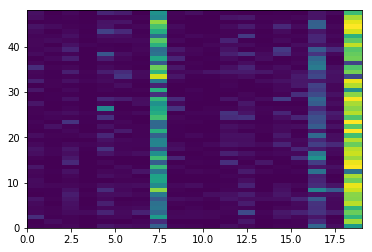

In [153]:
plt.pcolor(subdep)

graphing subsets of the gene dependency and gene effect from the new 20Q1 data set from depmap.
doing correlations for both next. check for the files in the depmap resources.

In [7]:
subdep_corr = subdep.corr()
subdep_corr.shape

subdep_corr.to_csv("/mnt/21c61ebf-7da6-4893-901e-fcbfe7286baf/annerer/project/correlation.csv",encoding="utf-8")

In [12]:
dep.to_feather('/mnt/21c61ebf-7da6-4893-901e-fcbfe7286baf/annerer/project/test.feather')

In [13]:
dep = pd.read_feather('/mnt/21c61ebf-7da6-4893-901e-fcbfe7286baf/annerer/project/test.feather')

In [57]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://',echo=False)
#dep.to_sql('mydata',con=engine)
#downloading directly to sqlite3 and saving intermediate steps

In [63]:
#pip install sqlalchemy

import sqlite3
conn = sqlite3.connect('test.db')
c = conn.cursor()

c.execute('''CREATE TABLE effect (gene_names, gene_effect)''')
df = pd.DataFrame([1,2,3,4])
df.to_sql('effect',con=engine,if_exists='append')

#conn.commit()

#conn.close()

#sqlite3.version

OperationalError: table effect already exists

In [64]:
engine = create_engine('sqlite:///test.db',echo=False)

effect1 = pd.read_sql_table('effect',engine)

print(effect1)

Empty DataFrame
Columns: [gene_names, gene_effect]
Index: []


In [4]:
data = pd.read_feather('/mnt/21c61ebf-7da6-4893-901e-fcbfe7286baf/annerer/project/test.feather')


In [11]:
# pip install -U pyarrow

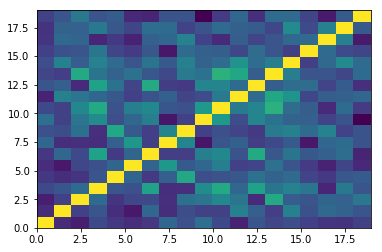

In [155]:
plt.pcolor(subdep_corr)

Text(0.5, 1.0, 'cdk4')

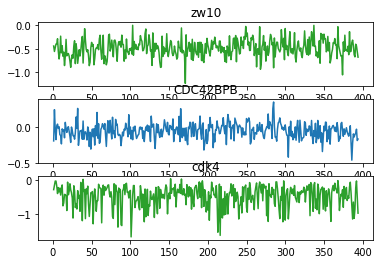

In [94]:
# same for the gene effect

fig, axis = plt.subplots(3)
#fig.subtitle("subplots")
zw10 = effect["ZW10 (9183)"]
cdk4 = effect["CDK4 (1019)"]
length = np.arange(1,len(zw10)+1,1)
axis[0].plot(length,zw10,"tab:green")
axis[0].set_title("zw10")
axis[1].plot(length,effect['CDC42BPB (9578)'])
axis[1].set_title("CDC42BPB")
axis[2].plot(length,cdk4,"tab:green")
axis[2].set_title("cdk4")

In [15]:
 subeffect =   effect[['A1BG (1)', 'A1CF (29974)', 'A2M (2)', 'A2ML1 (144568)',
       'A3GALT2 (127550)', 'A4GALT (53947)', 'A4GNT (51146)',
       'AAAS (8086)', 'AACS (65985)', 'AADAC (13)', 'AADACL2 (344752)',
       'AADACL3 (126767)', 'AADACL4 (343066)', 'AADAT (51166)',
       'AAED1 (195827)', 'AAGAB (79719)', 'AAK1 (22848)', 'AAMDC (28971)',
       'AAMP (14)']][2:50]

    
effect.to_feather('/mnt/21c61ebf-7da6-4893-901e-fcbfe7286baf/annerer/project/sub_effect.feather')

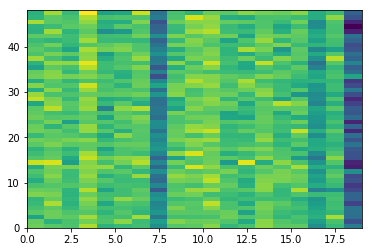

In [148]:
plt.pcolor(subeffect)

In [150]:
subeffect_corr = subeffect.corr()
subeffect_corr.shape

(19, 19)

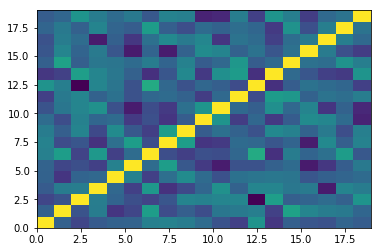

In [151]:
plt.pcolor(subeffect_corr)

In [141]:
#negative_subeffect = -100 *  effect[['A1BG (1)', 'A1CF (29974)', 'ZYX (7791)','ZZEF1 (23140)', 'ZZZ3 (26009)']][2:20]

In [139]:
#plt.pcolor(negative_subeffect)

In [59]:
sum(dep["ZW10 (9183)"])

225.78541729800097

In [58]:
sum(dep['CDC42BPB (9578)'])

18.881451925012367

In [ ]:
plt.pcolor(effect[1:20][1:20])

In [89]:
dep_sum = []

for i in np.arange(1,1020,1):
    dep_sum.append((sum(dep[dep.columns.values[i]])))
    
np.sort(dep_sum)

array([  0.54541611,   0.55014995,   0.58803223, ..., 391.92899655,
       393.07580923, 393.3476381 ])

In [93]:
effect_sum = []

for i in np.arange(1,1020,1):
    effect_sum.append((sum(effect[effect.columns.values[i]])))
    
np.sort(effect_sum)

array([-560.57134908, -531.23643192, -501.71672704, ...,  103.21443954,
        103.43256422,  112.7398018 ])

We can see quantitatively what the graphs above indicate: the overall dependency of ZW10 is quite high, leading to a comparatively large sum of overall dependencies.
CDC42BPB has a much lower total sum, but still shows some peaks.

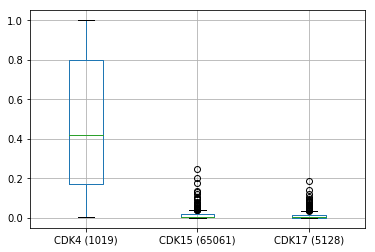

In [14]:
dep.boxplot(['CDK4 (1019)', 'CDK15 (65061)', 'CDK17 (5128)'])

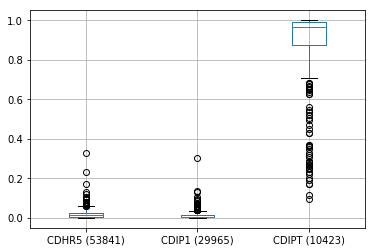

In [10]:
dep.boxplot(column=['CDHR5 (53841)','CDIP1 (29965)','CDIPT (10423)'])

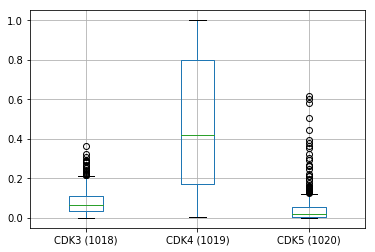

In [9]:
from pandas.plotting import _converter
boxplot = dep.boxplot(column=['CDK3 (1018)', 'CDK4 (1019)', 'CDK5 (1020)'])

In [127]:
from pandas.plotting import _converter

In [5]:
subframe = dep.head()

In [13]:
subframe.corr()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZUFSP (221302),ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
A1BG (1),1.000000,-0.286017,-0.232125,-0.206154,-0.054231,-0.328405,-0.487416,0.470554,0.867497,0.882333,...,-0.174721,-0.487989,0.018046,0.447018,0.947475,-0.236568,0.365861,0.554812,-0.351894,-0.237882
A1CF (29974),-0.286017,1.000000,-0.127814,-0.253921,-0.106388,-0.744795,0.513984,-0.733692,-0.322585,-0.457256,...,0.289518,-0.608142,-0.560527,-0.010419,0.007437,-0.248196,-0.150516,-0.229923,0.594955,0.991117
A2M (2),-0.232125,-0.127814,1.000000,0.679392,0.490610,-0.036412,0.373495,0.461798,0.070173,0.236985,...,0.660372,0.389652,-0.641045,0.538992,-0.177666,0.917603,0.522591,0.232171,0.446123,-0.228164
A2ML1 (144568),-0.206154,-0.253921,0.679392,1.000000,-0.277739,0.300615,-0.304927,0.675191,-0.283799,0.123876,...,-0.078653,0.167615,-0.153574,-0.096829,-0.169902,0.393890,-0.169480,-0.399355,-0.230335,-0.378914
A3GALT2 (127550),-0.054231,-0.106388,0.490610,-0.277739,1.000000,-0.173770,0.749726,-0.081726,0.447960,0.194415,...,0.869221,0.507025,-0.466873,0.763828,-0.108135,0.772271,0.879973,0.799172,0.714185,-0.081836
A4GALT (53947),-0.328405,-0.744795,-0.036412,0.300615,-0.173770,1.000000,-0.417187,0.325210,-0.373625,-0.233638,...,-0.492780,0.737930,0.777162,-0.566404,-0.583186,0.044217,-0.394362,-0.363386,-0.596428,-0.751855
A4GNT (51146),-0.487416,0.513984,0.373495,-0.304927,0.749726,-0.417187,1.000000,-0.592984,-0.071668,-0.351390,...,0.879238,0.234712,-0.648416,0.456207,-0.366489,0.540682,0.502809,0.347370,0.969835,0.516871
AAAS (8086),0.470554,-0.733692,0.461798,0.675191,-0.081726,0.325210,-0.592984,1.000000,0.413033,0.736927,...,-0.173102,0.163582,0.077647,0.238685,0.347161,0.333928,0.213588,0.170747,-0.507332,-0.791553
AACS (65985),0.867497,-0.322585,0.070173,-0.283799,0.447960,-0.373625,-0.071668,0.413033,1.000000,0.902207,...,0.281906,-0.176764,-0.229504,0.789435,0.794650,0.196706,0.771686,0.891050,0.036336,-0.272126
AADAC (13),0.882333,-0.457256,0.236985,0.123876,0.194415,-0.233638,-0.351390,0.736927,0.902207,1.000000,...,0.099337,-0.204854,-0.195690,0.672069,0.816907,0.218912,0.608823,0.671384,-0.203184,-0.453162


In [48]:
#dep.columns.values[1:100]

In [16]:
subf = dep[['A1BG (1)', 'A1CF (29974)', 'A2M (2)', 'A2ML1 (144568)',
       'A3GALT2 (127550)', 'A4GALT (53947)', 'A4GNT (51146)',
       'AAAS (8086)', 'AACS (65985)', 'AADAC (13)', 'AADACL2 (344752)',
       'AADACL3 (126767)', 'AADACL4 (343066)', 'AADAT (51166)',
       'AAED1 (195827)', 'AAGAB (79719)', 'AAK1 (22848)', 'AAMDC (28971)',
       'AAMP (14)', 'AANAT (15)', 'AAR2 (25980)', 'AARD (441376)',
       'AARS (16)', 'AARS2 (57505)', 'AARSD1 (80755)', 'AASDH (132949)',
       'AASDHPPT (60496)', 'AASS (10157)', 'AATF (26574)', 'AATK (9625)',
       'ABAT (18)', 'ABCA1 (19)', 'ABCA10 (10349)', 'ABCA12 (26154)',
       'ABCA13 (154664)', 'ABCA2 (20)']]


subcorr = subf.corr()

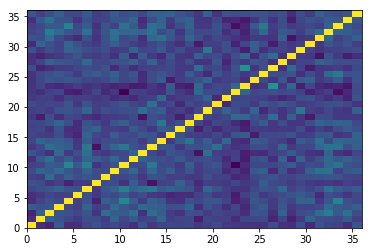

In [17]:
plt.pcolor(subcorr)

In [19]:
dep.columns.values[2650:2700]

array(['CDC42BPB (9578)', 'CDC42BPG (55561)', 'CDC42EP1 (11135)',
       'CDC42EP2 (10435)', 'CDC42EP3 (10602)', 'CDC42EP4 (23580)',
       'CDC42EP5 (148170)', 'CDC42SE1 (56882)', 'CDC42SE2 (56990)',
       'CDC45 (8318)', 'CDC5L (988)', 'CDC6 (990)', 'CDC7 (8317)',
       'CDC73 (79577)', 'CDCA2 (157313)', 'CDCA3 (83461)',
       'CDCA4 (55038)', 'CDCA5 (113130)', 'CDCA7 (83879)',
       'CDCA7L (55536)', 'CDCA8 (55143)', 'CDCP1 (64866)',
       'CDCP2 (200008)', 'CDH1 (999)', 'CDH10 (1008)', 'CDH11 (1009)',
       'CDH12 (1010)', 'CDH13 (1012)', 'CDH15 (1013)', 'CDH16 (1014)',
       'CDH17 (1015)', 'CDH18 (1016)', 'CDH19 (28513)', 'CDH2 (1000)',
       'CDH20 (28316)', 'CDH22 (64405)', 'CDH23 (64072)', 'CDH24 (64403)',
       'CDH26 (60437)', 'CDH3 (1001)', 'CDH4 (1002)', 'CDH5 (1003)',
       'CDH6 (1004)', 'CDH7 (1005)', 'CDH8 (1006)', 'CDH9 (1007)',
       'CDHR1 (92211)', 'CDHR2 (54825)', 'CDHR3 (222256)',
       'CDHR4 (389118)'], dtype=object)

In [20]:
subf2 = dep[['CDC42BPB (9578)', 'CDC42BPG (55561)', 'CDC42EP1 (11135)',
       'CDC42EP2 (10435)', 'CDC42EP3 (10602)', 'CDC42EP4 (23580)',
       'CDC42EP5 (148170)', 'CDC42SE1 (56882)', 'CDC42SE2 (56990)',
       'CDC45 (8318)', 'CDC5L (988)', 'CDC6 (990)', 'CDC7 (8317)',
       'CDC73 (79577)', 'CDCA2 (157313)', 'CDCA3 (83461)',
       'CDCA4 (55038)', 'CDCA5 (113130)', 'CDCA7 (83879)',
       'CDCA7L (55536)', 'CDCA8 (55143)', 'CDCP1 (64866)',
       'CDCP2 (200008)', 'CDH1 (999)', 'CDH10 (1008)', 'CDH11 (1009)',
       'CDH12 (1010)', 'CDH13 (1012)', 'CDH15 (1013)', 'CDH16 (1014)',
       'CDH17 (1015)', 'CDH18 (1016)', 'CDH19 (28513)', 'CDH2 (1000)',
       'CDH20 (28316)', 'CDH22 (64405)', 'CDH23 (64072)', 'CDH24 (64403)',
       'CDH26 (60437)', 'CDH3 (1001)', 'CDH4 (1002)', 'CDH5 (1003)',
       'CDH6 (1004)', 'CDH7 (1005)', 'CDH8 (1006)', 'CDH9 (1007)',
       'CDHR1 (92211)', 'CDHR2 (54825)', 'CDHR3 (222256)',
       'CDHR4 (389118)']]

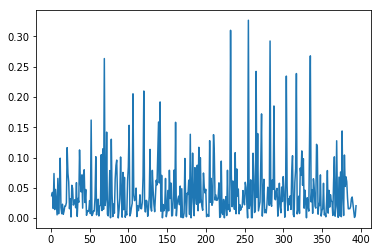

In [36]:
subf2corr = subf2.corr()

max(subf2corr)

#plt.pcolor(subf2corr)

c = np.arange(1,51,1)

plt.plot(b, dep['CDHR4 (389118)'])

In [ ]:
subf2corr[]

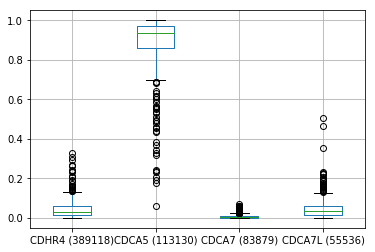

In [49]:
#plt.plot(c, subf2corr['CDHR4 (389118)'])
dep.boxplot(column=['CDHR4 (389118)', 'CDCA5 (113130)', 'CDCA7 (83879)',
       'CDCA7L (55536)'])

looking at correlations in a subset of the protein network.


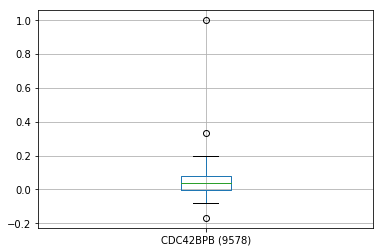

In [40]:
#plt.plot(c,subf2corr['CDC42BPB (9578)'])
subf2corr.boxplot(column=['CDC42BPB (9578)'])

In [31]:
min(subf2corr)

'CDC42BPB (9578)'

In [6]:
import re

In [45]:
lines = [re.sub(r'[\n\r]*','', str(x)) for x in dep['line']]

# Q1: how to get cell lines out of matrix?


In [58]:
# reverse phase protein array data from the CCLE
rppa = pd.read_csv(r"/home/annerer/Downloads/CCLE_RPPA_20181003.csv")
rppa.head()

,Unnamed: 0,14-3-3_beta,14-3-3_epsilon_Caution,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf_pS299_Caution,...,Tuberin_pT1462,VAV1_Caution,VEGFR2,VHL_Caution,XBP1_Caution,XRCC1_Caution,YAP_Caution,YAP_pS127_Caution,YB-1,YB-1_pS102
0,DMS53_LUNG,-0.104888,0.060414,0.309068,-0.075506,0.230359,0.198304,-0.030541,0.455889,0.090484,...,-0.099433,-0.486715,-1.147858,0.133876,-0.075812,-0.144388,-1.090303,-2.109324,0.178104,0.246541
1,SW1116_LARGE_INTESTINE,0.358504,-0.180291,-0.041237,-0.286629,-0.877406,-1.026948,-0.462761,-0.011197,0.605330,...,-0.109777,0.349330,0.770148,0.984297,-0.168138,-0.004905,0.189294,-0.283593,0.255972,-0.121134
2,NCIH1694_LUNG,0.028738,0.071902,-0.094847,0.285069,1.321551,0.620703,-0.439484,0.195007,0.036221,...,0.154344,-0.478189,-1.185530,1.273013,-0.240413,0.476633,-1.367465,-2.525695,-0.137880,-0.451282
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.120039,-0.066802,-0.128007,-0.552081,-0.292428,-1.415935,-0.138858,-0.066122,-0.346564,...,0.040106,5.923830,-3.893832,-2.499188,0.632758,0.025639,-1.189180,-3.056863,0.025997,-0.465205
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.268997,-0.060281,-0.137881,-0.398729,-0.095622,-0.533905,0.054245,-0.573022,-0.162968,...,-0.466919,5.475880,-0.561973,-0.500953,-0.261494,0.358679,-0.951686,-3.247388,-0.151424,-0.145426


In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
#pca.fit(rppa)

In [46]:
#pip install sklearn

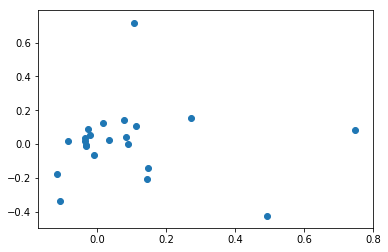

In [61]:
#rppa.columns.values

subrppa = rppa[['MEK1_pS217_S221', 'MIG-6', 'Mre11_Caution', 'MSH2',
       'MSH6_Caution', 'mTOR', 'mTOR_pS2448_Caution', 'MYH11',
       'Myosin IIa pS1943', 'N-Cadherin', 'N-Ras', 'NDRG1_pT346',
       'NF-kB-p65_pS536_Caution', 'NF2_Caution', 'Notch1',
       'P-Cadherin_Caution', 'p14 Arf(BetA300-340A)_Caution', 'p21',
       'p27', 'p27_pT157_Caution', 'p27_pT198', 'p38 alpha MAPK']]


#subrppa['MIG-6'][1:10]

pca = PCA(n_components=5)
pca.fit(subrppa)

plt.scatter(pca.components_[1],pca.components_[2])


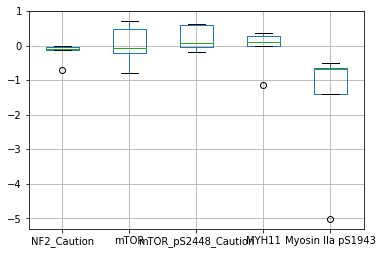

In [18]:
subrppa.boxplot(column=['NF2_Caution','mTOR', 'mTOR_pS2448_Caution', 'MYH11',
       'Myosin IIa pS1943'])

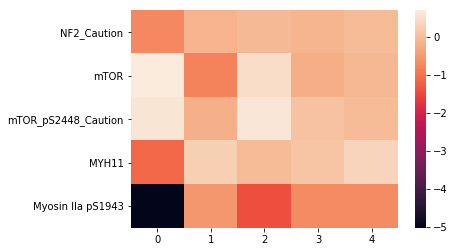

In [23]:
import seaborn as sns
sns.heatmap(subrppa[['NF2_Caution','mTOR', 'mTOR_pS2448_Caution', 'MYH11',
       'Myosin IIa pS1943']].T)

In [33]:
subrppa['NF2_Caution'][:]


0   -0.717358
1   -0.135333
2   -0.051470
3   -0.105604
4   -0.015267
Name: NF2_Caution, dtype: float64

In [47]:
#pip install seaborn

[[ 0.35242311  0.26606222  0.0391569   0.45672343  0.45395816  0.22979627
  -0.04532566  0.56892483 -0.01921039  0.09947884]
 [-0.25299104  0.60363026  0.13408392 -0.04472402  0.41567473 -0.56126502
   0.16754833 -0.18806588  0.01689134 -0.01081013]
 [-0.0192976  -0.27978155  0.6858912   0.11018905 -0.11971188 -0.1334524
   0.53809195  0.23076946  0.21131174 -0.13845904]
 [-0.42676128  0.14976315 -0.46211749 -0.1190878   0.00696854  0.3458421
   0.52073417  0.23338365  0.34927658 -0.02073348]
 [ 0.4746676  -0.18061744 -0.28255232 -0.16426403  0.14670253 -0.15341427
   0.58899675 -0.12468999 -0.40310276  0.25541213]]

 
 
[7.12159348 6.43338093 5.41519002 4.9586988  4.16149854]


Text(0, 0.5, 'PCA2')

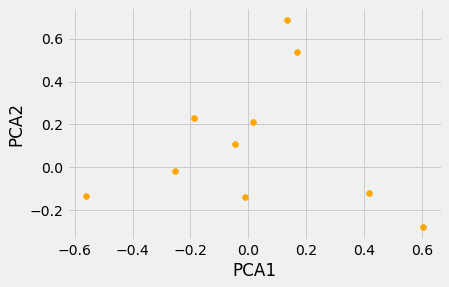

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.DataFrame(data=np.random.normal(0, 1, (20, 10)))
#print(df)
pca = PCA(n_components=5)
pca.fit(df)


print(pca.components_)
print('\n \n ')
print(pca.singular_values_)

plt.scatter(pca.components_[1],pca.components_[2],color="orange")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

In [67]:
df = pd.DataFrame(np.random.rand(20,5))
df.to_csv("test.csv",encoding="utf-8")

Questions in markdown cells and answers in code cells.

Q: how do I select relevant cell lines from the whole matrix of gene effects and dependencies? (loc and iloc for access in pandas dfs).

Q: Do i look for clusters of high depencencies/effects/codependencies/coessentialities, especially in cell lines? That is, how do I look for novel interesting connections? For cdk signaling and potential mutual exclusivity that makes intuitive sense, but which cells do I look at, grouped by what characteristics, when looking for new things?

for certain relevant genes, certain relevant connections might be ranked and looked at. for example, there are a few, see fig 1, where there is not much of a dependency overall, and others with a lot of overall dependency. Interesting things would be things that do not have a generally high dependency, but have high dependency with each other specifically.

Q: once you have run bagel and generated a bayes score, and have run a correlation,
   you are left with a big matrix. what do you want to know about it?


In [4]:
# using enumerate for fun and profit
#for num, ele in enumerate(elements):
 #   print(num, ele)

In [1]:

#data = pd.DataFrame(np.array([[1,2,3,4,5],[3,4,3,6,7],[3,5,6,3,2]]))
#plt.pcolor(data)
#print(data)

#data.drop(data.columns[1],axis=0)
#plt.pcolor(data)
#data = data.drop(data.columns[0],axis=1)
#data = data.drop(data.columns[0],axis=1)
#print(data)

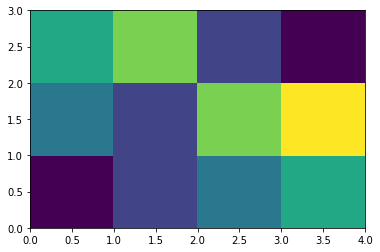

In [108]:
plt.pcolor(data)